In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd

data = pd.read_csv('/content/gdrive/My Drive/SentimentAnalysis/rnn/data/25000HSA-test.csv')

data['CleanText'] = data['CleanText'].astype(str)    # Convert datatype to integer
data.head(20)

,CleanText,Sentiment
0,eels î syria had sent official expressions of ...,0
1,there was palpable anger toward washington in ...,0
2,now he said it s about territory for peace and...,1
3,how do i formally complain about your customer...,0
4,on october rd the london spectator citing much...,0
5,we do have vulnerabilities and we do talk abou...,0
6,moussaoui s frenetic behavior in and out of co...,0
7,morton abramowitz a former assistant secretary...,0
8,when the white house started its anti iran cam...,0
9,wish i could catch every mosquito in the world...,0


### Load RNN Model & Tokanizer

In [3]:
import pickle
from keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.preprocessing.sequence import pad_sequences
import re
from nltk.tokenize import word_tokenize

with open('/content/gdrive/My Drive/SentimentAnalysis/rnn/tokenizers/tokenizer-rnn-cnn-w2v-feb-13.pickle', 'rb') as handle:
  tokenizer = pickle.load(handle)
# load rnn model
rnn_model = load_model('/content/gdrive/My Drive/SentimentAnalysis/rnn/models/rnn-cnn-w2v-model-feb-13-04-0.9567.hdf5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [4]:
test_sequences = tokenizer.texts_to_sequences(data.CleanText)
padded_test_sequences = pad_sequences(test_sequences, maxlen=35)
y_pred = rnn_model.predict(padded_test_sequences, verbose=1, batch_size=2048)
y_pred = pd.DataFrame(y_pred, columns=['Prediction'])
data['Prediction'] = y_pred['Prediction'].map(lambda p: 1 if p >= 0.5 else 0)
data = data.dropna()
data['Prediction'] = data['Prediction'].astype(int)
print(accuracy_score(data['Sentiment'], data['Prediction']*100))

1641/1641 [==============================] - 2s 917us/step
0.753199268738574


#### Accuracy
We got a **75.32%** accuracy which improved from around 69.63% accuracy from last time!

## Analysis
### WordCloud

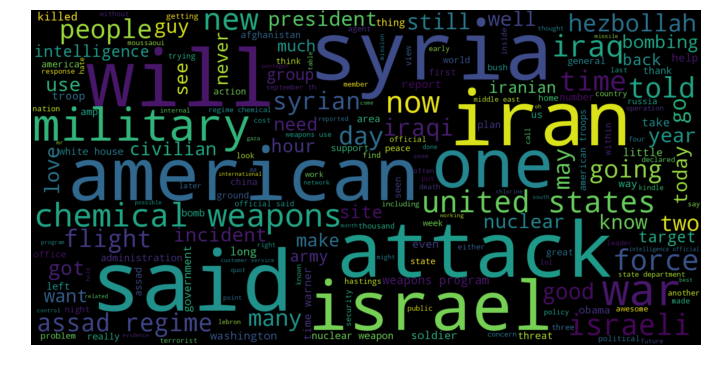

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the tweets in a single text
wordcloud_texts = ' '.join(data['CleanText'].tolist()).lower()

wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(wordcloud_texts)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Piechart

In [0]:
def plot_pie_chart(positive_count, negative_count, title):
  # Data to plot
  labels = 'Positive', 'Negative'
  sizes = [positive_count, negative_count]
  colors = ['yellowgreen', 'lightcoral']
  explode = (0.1, 0)  # explode 1st slice

  # Plot
  plt.pie(sizes, explode=explode, labels=labels, colors=colors,
          autopct='%1.1f%%', shadow=True, startangle=140)
  plt.title(title)
  plt.axis('equal')
  plt.rcParams["figure.figsize"] = (10, 6)
  plt.show()

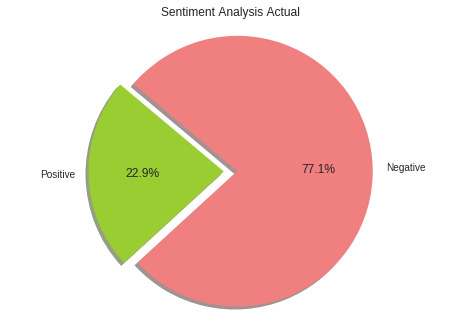

In [7]:
plot_pie_chart(data['Sentiment'].value_counts()[1], data['Sentiment'].value_counts()[0], 
               'Sentiment Analysis Actual')

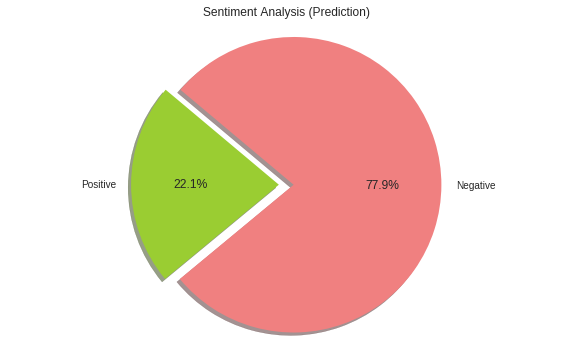

In [8]:
plot_pie_chart(data['Prediction'].value_counts()[1], data['Prediction'].value_counts()[0],
              'Sentiment Analysis (Prediction)')

In [9]:
data

,CleanText,Sentiment,Prediction
0,eels î syria had sent official expressions of ...,0,0
1,there was palpable anger toward washington in ...,0,0
2,now he said it s about territory for peace and...,1,1
3,how do i formally complain about your customer...,0,0
4,on october rd the london spectator citing much...,0,0
5,we do have vulnerabilities and we do talk abou...,0,0
6,moussaoui s frenetic behavior in and out of co...,0,0
7,morton abramowitz a former assistant secretary...,0,0
8,when the white house started its anti iran cam...,0,0
9,wish i could catch every mosquito in the world...,0,0
